# Scrapping

De ante-mão:

1. leiam a documentação do selenium (o que funciona para um site pode não e provavelmente não vai funcionar pra outro)

2. Uma estudada em código fonte de site é uma boa, se você nunca abriu um código fonte te adianto que é um saco (os dev web que me perdoem)

3. Tentem, vocês vão errar uma, duas, três, quarto... quinhentas vezes kkkkkkkkk mas uma hora dá certo (EU JURO!)


Já vou avisando que esse é o primeiro script (quase mesmo nível de print("Hello Word")), aquele que bem de comecinho de carreira onde você aprender a engatinhar pra um dia andar, ele é bem simplão para geral entender e poder replicar e principalmente entender o que está aqui (até pq isso aqui é meu estudo tb):



#### O que nós vamos usar?

In [1]:
from selenium import webdriver #ele que vai fazer a mágica, sugiro real COMER a documentação do selenium
import pandas as pd #transformar em data frame <3
import numpy as np #reshape e deixar nossa base 100% fofa e certinha
import matplotlib.pyplot as plt #pra ver uns grafin show de bola logo de cara

driver = webdriver.Chrome() #conector do chrome mas podia ser firefox (se sem o caminho não encontrar seu chrome driver vai ter que apontar a pasta que ele está)
driver.implicitly_wait(30) #pedindo pro carinha dar uma esperada antesde carregar tudo pra não gastar a memoria toda



In [2]:
# aqui passamos a URL do site com os dados (to usando o site do MS com os dados de covid)
driver.get('https://susanalitico.saude.gov.br/extensions/covid-19_html/covid-19_html.html')


***STOP TO TALK:***

*Tentei MUITO puxar tudo de uma vez, pero, entretanto, porém, todavia os dados do MS são de origem de uma tabela do QlikView ligada no site por uma API, então, depois de taaaaaaaaaaaaaaaaaaaaaaanto bater cabeça *(e xingar o site, rs)* achei mais simples realmente dividir entre as primeiras linhas e o corpo dos dados.*

Então o que nós fazemos aqui:
1. Inspecionamos o código fonte (ctrl+shift+i +lágrimas) like a Sherlock Holmes
2. Encontramos em quando parte do código estão os dados, em uma tabela (se a vida for legal com agt) ou em container (onde a vida não foi muito legal mas dá pra resolver tb)

**No nosso caso  estão em um container integrado a uma tabela do QlikeView e por isso a forma mais *no brain* foi via procura nos elementos pela classe do nome, existem muitas outras possibilidades e por isso é legal estar familiarizado com estrutura e com o pacote do selenium e afins**

belezura, voltemos ao código:

In [3]:
# Nosso querido header da tabela

header_table= driver.find_elements_by_class_name("qv-st-header") 

start = 0  

for job in header_table: # trago os dados das primeiras linhas
    a = job.text
    text = a.strip().split('\n')
    l = pd.DataFrame(text,columns=['Column_Name'])
    print(l) #printo a lista
    
    for i in range(len(l.index)): # transformo a lista nas linhas certinhas
        if (i + 1) % 16 == 0:  
            result = l['Column_Name'].iloc[start:i+1].values.reshape(2,8)
            print(result) #printo o resultado das duas linhas certinhas
            
            start = i + 1  
            fl_df = pd.DataFrame(result)

            new_header = fl_df.iloc[0] # mudo para o cabeçalho de colunas certo
            hd_df = fl_df[1:] 
            hd_df.columns = new_header 
            print(hd_df) # printo as primeiras linhas do dataframe bunitinhas
            



                  Column_Name
0                      Região
1                   População
2                 Casos Novos
3            Casos Acumulados
4      Casos Acumulados 100mi
5                Óbitos Novos
6           Óbitos Acumulados
7   Óbitos Acumumulados 100mi
8                      Totais
9                 210.147.125
10                     47.774
11                 11.998.233
12                      5.709
13                      1.290
14                    294.042
15                        140
[['Região' 'População' 'Casos Novos' 'Casos Acumulados'
  'Casos Acumulados 100mi' 'Óbitos Novos' 'Óbitos Acumulados'
  'Óbitos Acumumulados 100mi']
 ['Totais' '210.147.125' '47.774' '11.998.233' '5.709' '1.290' '294.042'
  '140']]
0  Região    População Casos Novos Casos Acumulados Casos Acumulados 100mi  \
1  Totais  210.147.125      47.774       11.998.233                  5.709   

0 Óbitos Novos Óbitos Acumulados Óbitos Acumumulados 100mi  
1        1.290           294.042        

In [4]:
# Nosso querido corpo da tabela, basicamente a mesma coisa do header

corp_table = driver.find_elements_by_class_name('scroll-content')

start = 0  # set start to 0 for slicing

for job in corp_table:
    a = job.text
    text = a.strip().split('\n')
    l = pd.DataFrame(text,columns=['Column_Name'])
    print(l)
    
    for i in range(len(l.index)):
        if (i + 1) % 32 == 0:  # the modulo operation
            result = l['Column_Name'].iloc[start:i+1].values.reshape(4,8)
            print(result)
            
            start = i + 1  
            cp_df = pd.DataFrame(result)
            
            new_header = ['Região', 'População', 'Casos Novos',
             'Casos Acumulados', 'Casos Acumulados 100mi', 'Óbitos Novos',
              'Óbitos Acumulados', 'Óbitos Acumumulados 100mi']
            cp_df.columns = new_header
            print(cp_df)
            


     Column_Name
0        Sudeste
1     88.371.433
2         22.140
3      4.321.051
4          4.890
5            522
6        131.622
7            149
8       Nordeste
9     57.071.654
10        10.611
11     2.768.474
12         4.851
13           338
14        64.124
15           112
16           Sul
17    29.975.984
18         7.764
19     2.352.107
20         7.847
21           176
22        41.301
23           138
24  Centro-Oeste
25    16.297.074
26         3.310
27     1.268.018
28         7.781
29           129
30        26.241
31           161
32         Norte
33    18.430.980
34         3.949
35     1.288.583
36         6.991
37           125
38        30.754
39           167
[['Sudeste' '88.371.433' '22.140' '4.321.051' '4.890' '522' '131.622'
  '149']
 ['Nordeste' '57.071.654' '10.611' '2.768.474' '4.851' '338' '64.124'
  '112']
 ['Sul' '29.975.984' '7.764' '2.352.107' '7.847' '176' '41.301' '138']
 ['Centro-Oeste' '16.297.074' '3.310' '1.268.018' '7.781' '129' '26.241'
 

TANTARARANNNNNNNNNNNNNNNNNNNNNN
TANTANTANTANRARANNNNNNNNNNNNNNNNNNNNN

TEMOS TEMOS TEMOS NOSSOS QUERIDOS DADOS E PODEMOS MONTAR NOSSA TABELINEA PUTS

*Aqui eu já tava/to chorando de felicidade*

Então vamos lá, juntar a tabela real oficial e fazer um grafin pra ver os dado bonitão:

In [5]:
df_all = hd_df.append(cp_df)

# GRAN FINALLE:

1. Vamos ver o head da tabelinha fofinha 
2. Plotar um gráfico, eu plotei umpie chart, obviamente tem gráficos bem melhores (até mesmo de barras) mas achei tão xodózin esse que me afeiçoei

In [6]:

df_all.head()

,Região,População,Casos Novos,Casos Acumulados,Casos Acumulados 100mi,Óbitos Novos,Óbitos Acumulados,Óbitos Acumumulados 100mi
1,Totais,210.147.125,47.774,11.998.233,5.709,1.290,294.042,140
0,Sudeste,88.371.433,22.140,4.321.051,4.890,522,131.622,149
1,Nordeste,57.071.654,10.611,2.768.474,4.851,338,64.124,112
2,Sul,29.975.984,7.764,2.352.107,7.847,176,41.301,138
3,Centro-Oeste,16.297.074,3.310,1.268.018,7.781,129,26.241,161


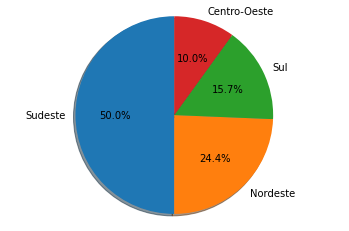

In [7]:

df_all = df_all[df_all['Região'] != 'Totais']

fig1, ax1 = plt.subplots()
ax1.pie(df_all['Óbitos Acumulados'], labels=df_all['Região'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()